# Coordenadas Cromáticas y White-Patch
<p style='text-align: justify;'>
    En este notebook se buscar implementar la transformación de imagen de color a traves del método de coordenadas cromáticas y a través del algoritmo de White-Patch.
</p>

### Coordenadas Cromáticas
<p style='text-align: justify;'>
    Este método consiste en afectar pixel a pixel de la imagen en estudio dividiendo cada uno por la suma de las tres componentes RGB del mismo pixel. Supongamos que un determinado pixel $P_{ij}$ tiene la siguientes componentes RGB:
</p>

<p style='text-align: center;'>
    $(\,R_{ij}, G_{ij}, B_{ij})\,$
</p>

<p style='text-align: justify;'>
    Afectaremos cada componente de color de la siguiente manera:
</p>

<p style='text-align: center;'>
    $(\,R_{ij}, G_{ij}, B_{ij})\, \rightarrow (\, \frac{R_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{G_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{B_{ij}}{R_{ij}+G_{ij}+B_{ij}})\,$
</p>

<p style='text-align: justify;'>
    Esto no es otra cosa que los valores normalizados de R, G y B. Sumando las tres componenetes obtenemos la proyeccion sobre el plano $R+G+B=1$:
</p>

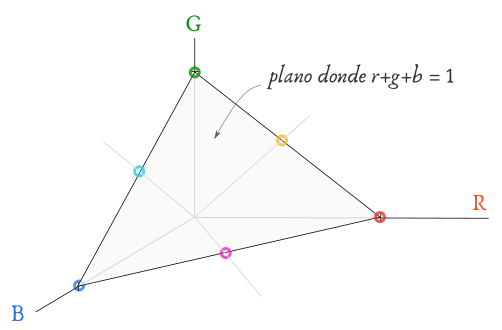

<p style='text-align: justify;'>    
    La ventaja de esta tranformacón reside en que si la imagen esta siendo afectada por una ganancia que altere su contraste, suponiendo una ganancia $K \in R$ esta se anula de la siguiente manera:
</p>

<p style='text-align: center;'>
    $(\, \frac{K.R_{ij}}{K.R_{ij}+K.G_{ij}+K.B_{ij}},  \frac{K.G_{ij}}{K.R_{ij}+K.G_{ij}+K.B_{ij}},  \frac{K.B_{ij}}{K.R_{ij}+K.G_{ij}+K.B_{ij}})\, =$
    $\frac{K}{K} (\,\frac{R_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{G_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{B_{ij}}{R_{ij}+G_{ij}+B_{ij}})\, =  (\,\frac{R_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{G_{ij}}{R_{ij}+G_{ij}+B_{ij}},  \frac{B_{ij}}{R_{ij}+G_{ij}+B_{ij}})\,$
    
</p>

<p style='text-align: justify;'>
    Por lo tanto, se puede generar un analisis de la imagen sin importar el nivel de contraste que la misma posea.
</p>

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

import time

In [2]:
def Coordenadas_Cromaticas(img):
    start_time = time.time()
    img1 = img.astype(float)
    suma = np.sum(img1, axis=2)
    for i in range(3):
        for fila in range(img1.shape[0]):
            for columna in range(img1.shape[1]):
                if suma[fila,columna] != 0:
                    img1[:,:,i][fila, columna] = img1[:,:,i][fila, columna] / suma[fila,columna]
                    if img1[:,:,i][fila, columna]>1:
                        print(img1[:,:,i][fila, columna])
                else:
                    img1[fila,columna] = 1.
    print(time.time()-start_time)
    return img1

In [3]:
def Coordenadas_Cromaticas2(img):
    start_time = time.time()
    img1 = img.astype(float)
    suma = np.sum(img1, axis=2)
    cero = np.argwhere(suma==0)
    # Detecto si alguna suma de R+G+B es cero y modifico la matriz suma y la matriz de la imagen para que tomen valor 1
    for i in cero:
        suma[i[0],i[1]]=1
        img1[:,:,:][i[0],i[1]]=1
    
    for j in range(3):
        img1[:,:,j] = img1[:,:,j] / suma
        
    print(time.time()-start_time)
    return img1

In [4]:
def White_Patch(img):
    img1 = img.astype(float)
    for i in range(3):
        img1[:,:,i] = (img1[:,:,i]/img1[:,:,i].max())
    return img1

In [5]:
Tito_Coord1 = cv.imread('CoordCrom_1.png')
Tito_Coord2 = cv.imread('CoordCrom_2.png')
Tito_Coord3 = cv.imread('CoordCrom_3.png')

Tito_Coord1_RGB = cv.cvtColor(Tito_Coord1,cv.COLOR_BGR2RGB)
Tito_Coord2_RGB = cv.cvtColor(Tito_Coord2,cv.COLOR_BGR2RGB)
Tito_Coord3_RGB = cv.cvtColor(Tito_Coord3,cv.COLOR_BGR2RGB)

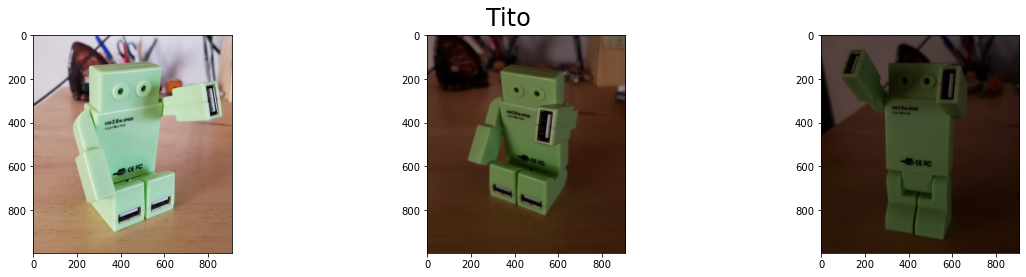

In [6]:
fig1, tito_RGB = plt.subplots(1,3)
fig1.suptitle('Tito', fontsize=24)
fig1.set_figwidth(20)
#fig1.set_figheight(10)
tito_RGB[0].imshow(Tito_Coord1_RGB)
tito_RGB[1].imshow(Tito_Coord2_RGB)
tito_RGB[2].imshow(Tito_Coord3_RGB)
plt.show()

In [7]:
# Dimensiones de la imagenes
print('Tamaño imagen 1: {} pix'.format(Tito_Coord1.shape))
print('Tamaño imagen 2: {} pix'.format(Tito_Coord2.shape))
print('Tamaño imagen 3: {} pix'.format(Tito_Coord3.shape))

Tamaño imagen 1: (996, 908, 3) pix
Tamaño imagen 2: (996, 908, 3) pix
Tamaño imagen 3: (996, 908, 3) pix


In [8]:
#Tito1 = Coordenadas_Cromaticas(Tito_Coord1_RGB)
Tito1 = Coordenadas_Cromaticas2(Tito_Coord1_RGB)
#Tito2 = Coordenadas_Cromaticas(Tito_Coord2_RGB)
Tito2 = Coordenadas_Cromaticas2(Tito_Coord2_RGB)
#Tito3 = Coordenadas_Cromaticas(Tito_Coord3_RGB)
Tito3 = Coordenadas_Cromaticas2(Tito_Coord3_RGB)

0.06918215751647949
0.050476789474487305
0.0592045783996582


Coordenadas_Cromaticas2 es una implementación del algoritmo utilizando vectorizacion. A continuacion se comparan los tiempos de ejecucion:

Imagen|Coordenadas_Cromaticas | Coordenadas_Cromaticas
:--------: | -------| -------
Tito1|7.0411 seg | 0.0743 seg
Tito2|6.6311 seg | 0.0645 seg
Tito3|6.396 seg | 0.06715 seg

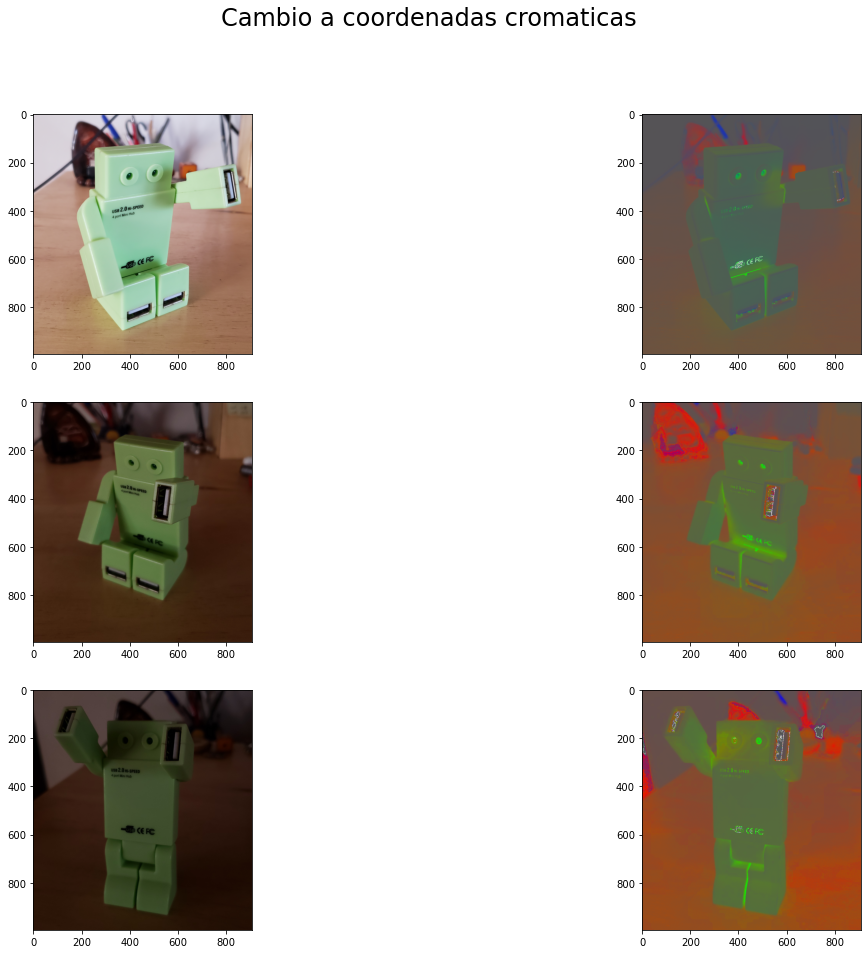

In [9]:
fig2, Tito_CoordCrom = plt.subplots(3, 2)
fig2.suptitle('Cambio a coordenadas cromaticas', fontsize=24)
fig2.set_figwidth(20)
fig2.set_figheight(15)
Tito_CoordCrom[0,0].imshow(Tito_Coord1_RGB)
Tito_CoordCrom[0,1].imshow(Tito1)
Tito_CoordCrom[1,0].imshow(Tito_Coord2_RGB)
Tito_CoordCrom[1,1].imshow(Tito2)
Tito_CoordCrom[2,0].imshow(Tito_Coord3_RGB)
Tito_CoordCrom[2,1].imshow(Tito3)
plt.show()

### White-Patch
<p style='text-align: justify;'>
    Este algoritmo consiste en encontrar el máximo nivel de intensidad de rojo, verde y azul de la imagen y asumir que corresponden al blanco puro. Una vez obtenidas estas componentes máximas entonces normalizamos al color de la luz blanca pura (255, 255, 255) de la siguiente manera:
</p>

<p style='text-align: center;'>
    $(\,R_{ij}, G_{ij}, B_{ij})\, \rightarrow (\, \frac{255}{R_{max}}R_{ij},  \frac{255}{G_{max}}G_{ij},  \frac{255}{B_{max}}B_{ij})\,$
</p>

<p style='text-align: justify;'>
    Al utilizar este algoritmo, se debe contemplar la posibilidad de que existe alguna componente pura. En dicho caso se deberá optar por algun criterio, como por ejemplo tomar el percentil del 90% de una determinada componente. En las aplicaciones que se muestran a continuación ante la inexistencia de una componente pura se tomo el máximo valor de cada una.
</p>

In [10]:
Test_blue = cv.imread('test_blue.png')
Test_green = cv.imread('test_green.png')
Test_red = cv.imread('test_red.png')

Test_blue_RGB = cv.cvtColor(Test_blue,cv.COLOR_BGR2RGB)
Test_green_RGB = cv.cvtColor(Test_green,cv.COLOR_BGR2RGB)
Test_red_RGB = cv.cvtColor(Test_red,cv.COLOR_BGR2RGB)

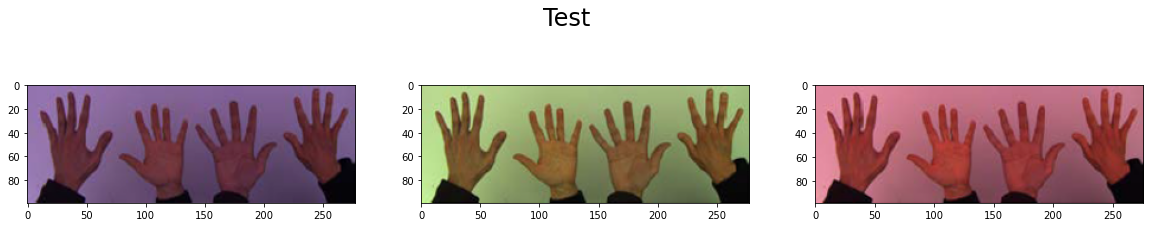

In [11]:
fig3, test_WP1 = plt.subplots(1,3)
fig3.suptitle('Test', fontsize=24)
fig3.set_figwidth(20)

test_WP1[0].imshow(Test_blue_RGB)
test_WP1[1].imshow(Test_green_RGB)
test_WP1[2].imshow(Test_red_RGB)
plt.show()

In [12]:
# Dimensiones de la imagenes
print('Tamaño imagen 1: {} pix'.format(Test_blue_RGB.shape))
print('Tamaño imagen 2: {} pix'.format(Test_green_RGB.shape))
print('Tamaño imagen 3: {} pix'.format(Test_red_RGB.shape))

Tamaño imagen 1: (100, 278, 3) pix
Tamaño imagen 2: (100, 278, 3) pix
Tamaño imagen 3: (99, 276, 3) pix


In [13]:
Blue = White_Patch(Test_blue_RGB)
Green = White_Patch(Test_green_RGB)
Red = White_Patch(Test_red_RGB)

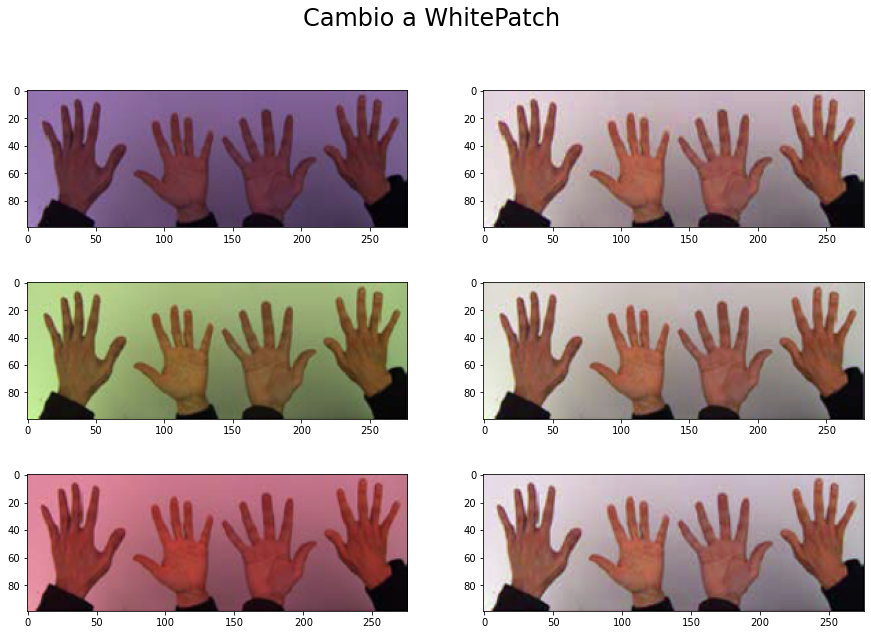

In [14]:
fig4, test_WP2 = plt.subplots(3, 2)
fig4.suptitle('Cambio a WhitePatch', fontsize=24)
fig4.set_figwidth(15)
fig4.set_figheight(10)
test_WP2[0,0].imshow(Test_blue_RGB)
test_WP2[0,1].imshow(Blue)
test_WP2[1,0].imshow(Test_green_RGB)
test_WP2[1,1].imshow(Green)
test_WP2[2,0].imshow(Test_red_RGB)
test_WP2[2,1].imshow(Red)
plt.show()

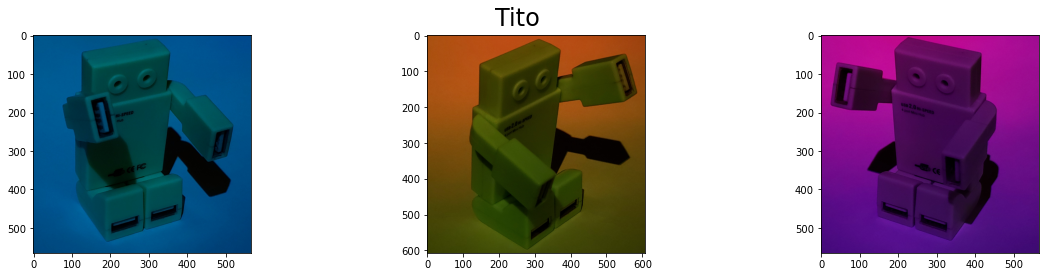

In [15]:
Tito_blue = cv.imread('WP_B.png')
Tito_orange = cv.imread('WP_O.png')
Tito_red = cv.imread('WP_R.png')

Tito_blue_RGB = cv.cvtColor(Tito_blue,cv.COLOR_BGR2RGB)
Tito_orange_RGB = cv.cvtColor(Tito_orange,cv.COLOR_BGR2RGB)
Tito_red_RGB = cv.cvtColor(Tito_red,cv.COLOR_BGR2RGB)

fig3, tito_RGB2 = plt.subplots(1,3)
fig3.suptitle('Tito', fontsize=24)
fig3.set_figwidth(20)

tito_RGB2[0].imshow(Tito_blue_RGB)
tito_RGB2[1].imshow(Tito_orange_RGB)
tito_RGB2[2].imshow(Tito_red_RGB)
plt.show()

In [16]:
# Dimensiones de la imagenes
print('Tamaño imagen 1: {} pix'.format(Tito_blue_RGB.shape))
print('Tamaño imagen 2: {} pix'.format(Tito_orange_RGB.shape))
print('Tamaño imagen 3: {} pix'.format(Tito_red_RGB.shape))

Tamaño imagen 1: (565, 565, 3) pix
Tamaño imagen 2: (607, 607, 3) pix
Tamaño imagen 3: (565, 565, 3) pix


In [17]:
Blue = White_Patch(Tito_blue_RGB)
Orange = White_Patch(Tito_orange_RGB)
Red = White_Patch(Tito_red_RGB)

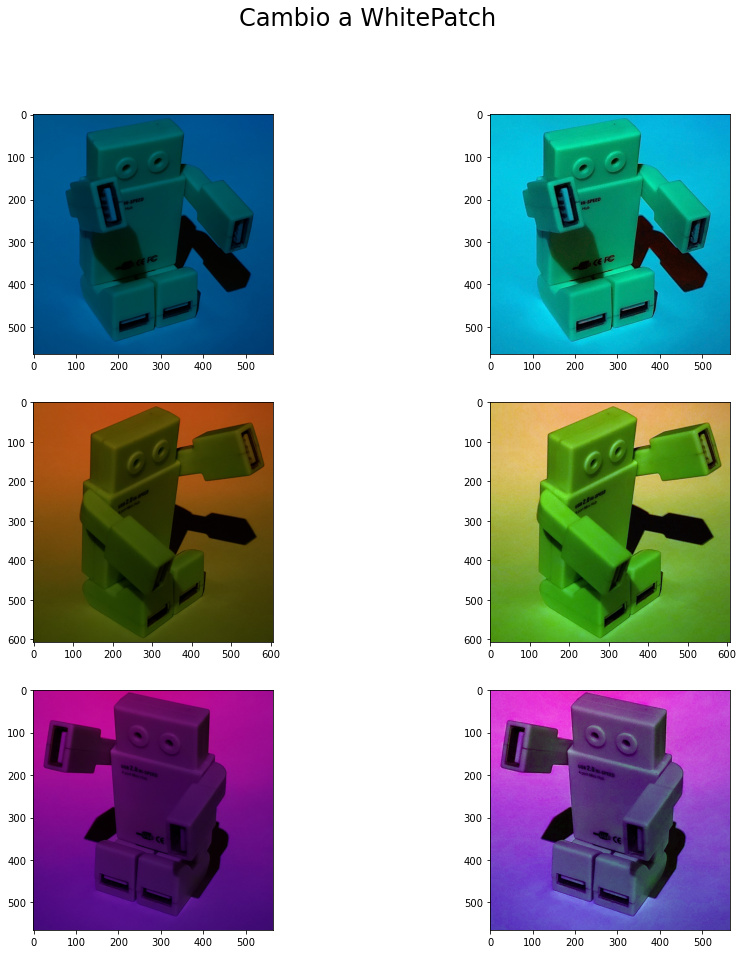

In [18]:
fig4, tito_WP = plt.subplots(3, 2)
fig4.suptitle('Cambio a WhitePatch', fontsize=24)
fig4.set_figwidth(15)
fig4.set_figheight(15)
tito_WP[0,0].imshow(Tito_blue_RGB)
tito_WP[0,1].imshow(Blue)
tito_WP[1,0].imshow(Tito_orange_RGB)
tito_WP[1,1].imshow(Orange)
tito_WP[2,0].imshow(Tito_red_RGB)
tito_WP[2,1].imshow(Red)
plt.show()